In [50]:
import pandas
from sklearn import svm, neighbors, ensemble, neural_network, naive_bayes
import matplotlib.pyplot as plt
import cv2
from numpy import std, ptp, median
from scipy.stats import skew, kurtosis, mstats
import eeglib
from sklearn import preprocessing
import pandas as pd

In [3]:
training_data = pandas.read_csv('features_train_70000.csv')
testing_data = pandas.read_csv('features_test_70000.csv')

x_train, y_train = training_data.drop([' Tag'], axis=1), training_data[' Tag']
x_test, y_test = testing_data.drop([' Tag'], axis=1), testing_data[' Tag']

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test)

In [4]:
classifier_svm = svm.SVC(kernel = 'linear', C=1, gamma='auto')
classifier_svm.fit(x_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [6]:
print("Accuracy on train set: ", classifier_svm.score(x_train, y_train))
print("Accuracy on test set: ", classifier_svm.score(x_test, y_test))

Accuracy on train set:  0.9048733013089519
Accuracy on test set:  0.9029930709336381


In [32]:
classifier_KN = neighbors.KNeighborsClassifier(n_neighbors=7)
classifier_KN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
print("Accuracy on train set: ", classifier_KN.score(x_train, y_train))
print("Accuracy on test set: ", classifier_KN.score(x_test, y_test))

Accuracy on train set:  0.9436775656708155
Accuracy on test set:  0.9294235302521608


In [34]:
classifier_RandF = ensemble.RandomForestClassifier(max_depth=15, n_estimators=200, max_features=4, min_samples_split=4)
classifier_RandF.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, max_features=4, min_samples_split=4,
                       n_estimators=200)

In [35]:
print("Accuracy on train set: ", classifier_RandF.score(x_train, y_train))
print("Accuracy on test set: ", classifier_RandF.score(x_test, y_test))

Accuracy on train set:  0.9834282755049197
Accuracy on test set:  0.9301378669904993


In [42]:
classifier_mlp = neural_network.MLPClassifier(alpha=0.001, max_iter=100)
classifier_mlp.fit(x_train, y_train)
y_prediction = classifier_mlp.predict(x_test)

/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
print("Accuracy on train set: ", classifier_mlp.score(x_train, y_train))
print("Accuracy on test set: ", classifier_mlp.score(x_test, y_test))

Accuracy on train set:  0.9287130127323702
Accuracy on test set:  0.924280305736124


In [44]:
classifier_naiveB = naive_bayes.GaussianNB()
classifier_naiveB.fit(x_train, y_train)
y_prediction = classifier_naiveB.predict(x_test)

In [45]:
print("Accuracy on train set: ", classifier_naiveB.score(x_train, y_train))
print("Accuracy on test set: ", classifier_naiveB.score(x_test, y_test))

Accuracy on train set:  0.898480330005893
Accuracy on test set:  0.8510607900564326


   Kurtosis   Skewness         Std   Range   Median   Geometric_Mean  \
0  4.072365   1.905576  163.679052   852.0     97.0        90.613099   

    Mobility   Complexity  
0   0.219565     3.327326  


/var/folders/xc/0v6s_22d4x31_zddmb9cj68m0000gn/T/ipykernel_1165/1803329674.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_test = x_test.append(df, ignore_index=True)


'Steganography'

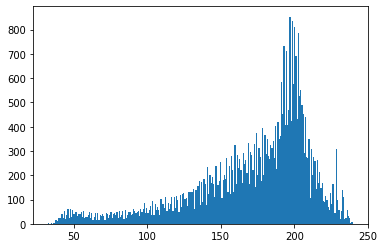

In [57]:
def steg_clean(img_path, classifier):
    im = cv2.imread(img_path)
    vals = im.mean(axis=2).flatten()
    b, bins, patches = plt.hist(vals, 255)
    data = {'Kurtosis' : [kurtosis(b)],
        ' Skewness' : [skew(b)],
        ' Std' : [std(b)],
        ' Range' : [ptp(b)],
        ' Median': [median(b)],
        ' Geometric_Mean': [mstats.gmean(b)],
        ' Mobility': [eeglib.features.hjorthMobility(b)],
        ' Complexity': [eeglib.features.hjorthComplexity(b)]
       }
    df = pd.DataFrame(data)
    print(df)
    testing_data = pd.read_csv('features_test_70000.csv')
    x_test, y_test = testing_data.drop([' Tag'], axis=1), testing_data[' Tag']
    x_test = x_test.append(df, ignore_index=True)

    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    x_test = scaler.fit_transform(x_test)

    return 'Steganography' if classifier.predict([x_test[13999]])[0] == 1 else 'Clean'

steg_clean('1.png', classifier_RandF)

   Kurtosis   Skewness          Std    Range   Median   Geometric_Mean  \
0  3.795353   2.211773  7126.091721  34481.0   4668.0      5719.093306   

    Mobility   Complexity  
0   0.157753     4.533149  


/var/folders/xc/0v6s_22d4x31_zddmb9cj68m0000gn/T/ipykernel_1165/1803329674.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_test = x_test.append(df, ignore_index=True)


'Clean'

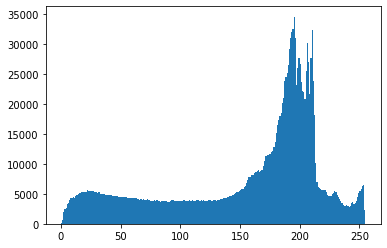

In [61]:
steg_clean('2.jpg', classifier_RandF)